## ANEXO 5: Cálculo de importancia de atributos

**IMPORTANTE**: este anexo utiliza los datos `X, y` (de entrenamiento y testeo) generados en el anexo anterior.

In [ ]:
import numpy as np
import pickle

from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt

In [ ]:
# carga de modelos de anexo anterior (para evitar generarlos cada vez que se inicia el notebook)

with open("../data/clfs/dummy.pkl", "rb") as f:
    dummy_clf = pickle.load(f)

with open("../data/clfs/tree.pkl", "rb") as f:
    tree_clf = pickle.load(f)

with open("../data/clfs/naive.pkl", "rb") as f:
    nb_clf = pickle.load(f)

with open("../data/clfs/rf.pkl", "rb") as f:
    rf_clf = pickle.load(f)

with open("../data/clfs/gboost.pkl", "rb") as f:
    gboost_clf = pickle.load(f)

with open("../data/clfs/sgd.pkl", "rb") as f:
    sgd_clf = pickle.load(f)


In [ ]:
# grafica los n_attrs atributos más importantes según un modelo
def plot_importances(importances_mean, importances_std=None, n_attrs=10, column_names=X.columns, use_abs=False, plot_title=""):

    if importances_std is None: importances_std = np.zeros(len(importances_mean))

    # ordena según importancia promedio (descendiente)
    if use_abs:
        indices = (-np.abs(importances_mean)).argsort()[:n_attrs]
    else:
        indices = (-importances_mean).argsort()[:n_attrs]

    # damos vuelta el arreglo, ya que barh rellena de abajo hacia arriba,
    # y nosotros queremos el inverso
    indices = np.flip(indices)

    fig, ax = plt.subplots()

    # grafica los primeros atributos
    ax.barh(
        range(n_attrs),
        importances_mean[indices],
        xerr=importances_std[indices],
    )

    ax.set_xlabel("Importancia del atributo")
    ax.set_yticks(range(n_attrs))
    ax.set_yticklabels(column_names[indices])
    fig.suptitle(plot_title)

### Extracción de coeficentes de modelos lineales

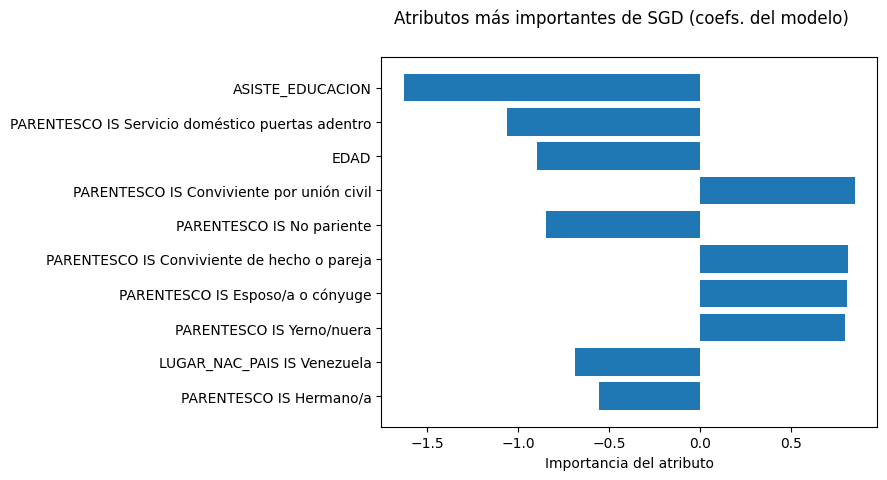

In [ ]:
coefs = sgd_clf.best_estimator_[1].coef_[0]

plot_importances(
    coefs,
    n_attrs=10,
    column_names=X.columns,
    use_abs=True,
    plot_title="Atributos más importantes de SGD (coefs. del modelo)"
)

### Extracción de importancias en modelos de árbol de decisión

In [ ]:
# usar feature_importances_ en random forest, decision tree, gradient boosting, graficar cada uno y analizar

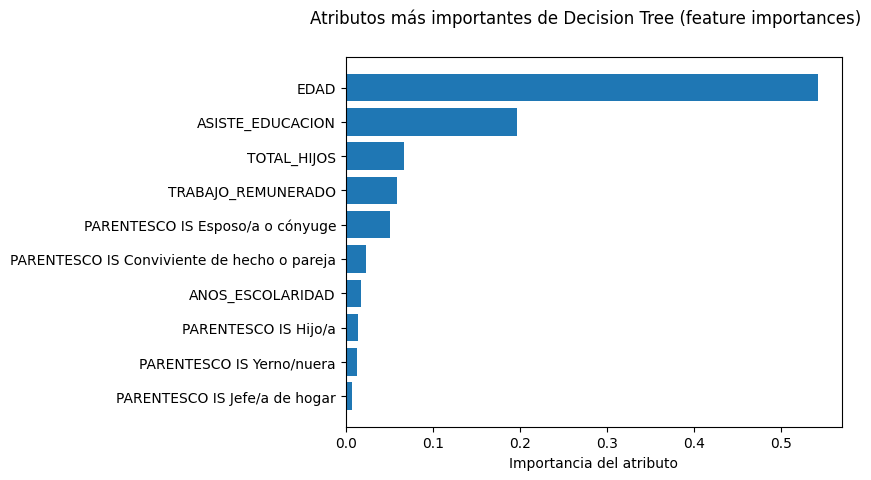

In [ ]:
# decision tree
tree_f_importances = tree_clf.best_estimator_[1].feature_importances_

plot_importances(
    tree_f_importances,
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de Decision Tree (feature importances)"
)

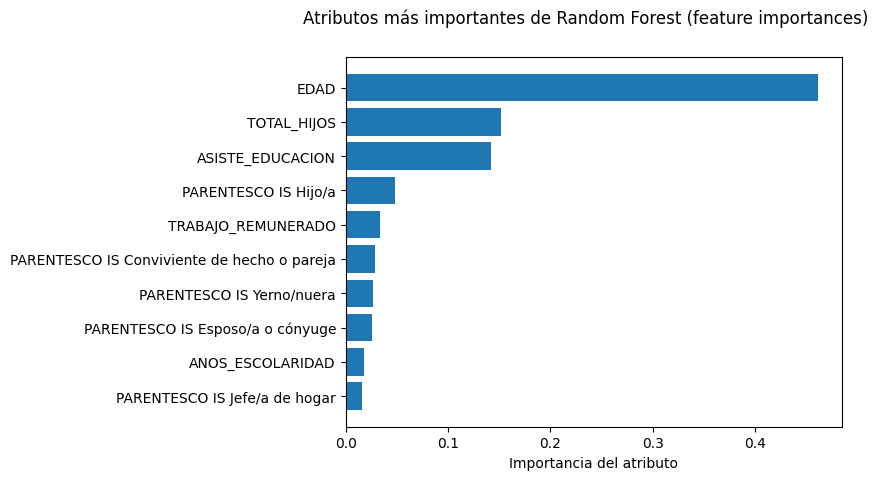

In [ ]:
# random forest
rf_f_importances = rf_clf.best_estimator_[1].feature_importances_

plot_importances(
    rf_f_importances,
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de Random Forest (feature importances)"
)

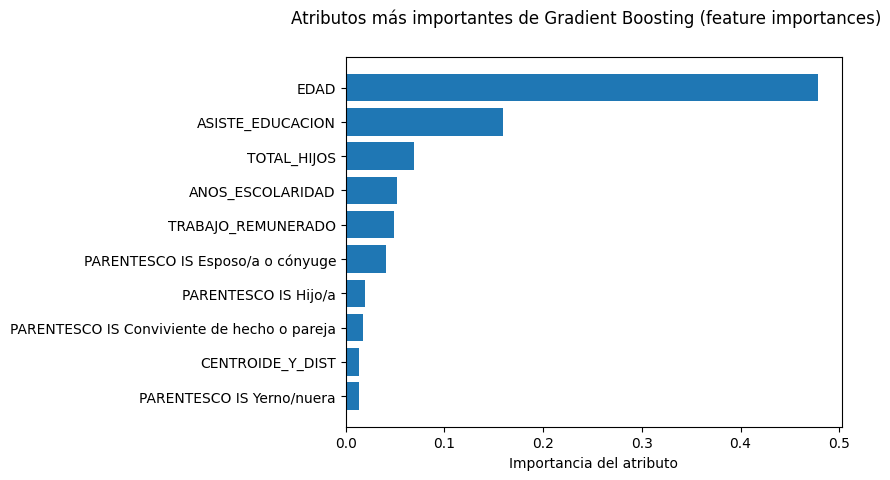

In [ ]:
# gradient boosting
gboost_f_importances = gboost_clf.best_estimator_[1].feature_importances_

plot_importances(
    gboost_f_importances,
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de Gradient Boosting (feature importances)"
)

### Extracción de importancias usando *permutation feature importances*

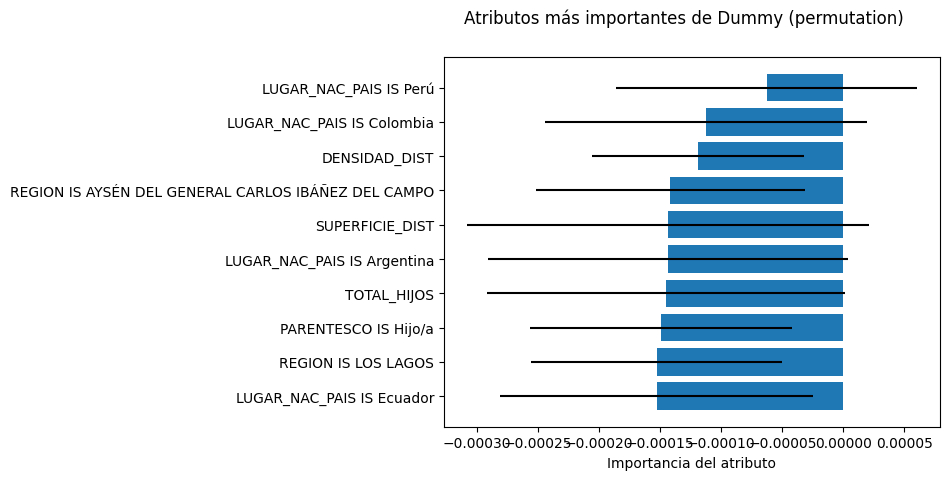

In [ ]:
dummy_importances = permutation_importance(dummy_clf, X_train, y_train, n_repeats=10)
plot_importances(
    dummy_importances["importances_mean"],
    dummy_importances["importances_std"],
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de Dummy (permutation)"
)

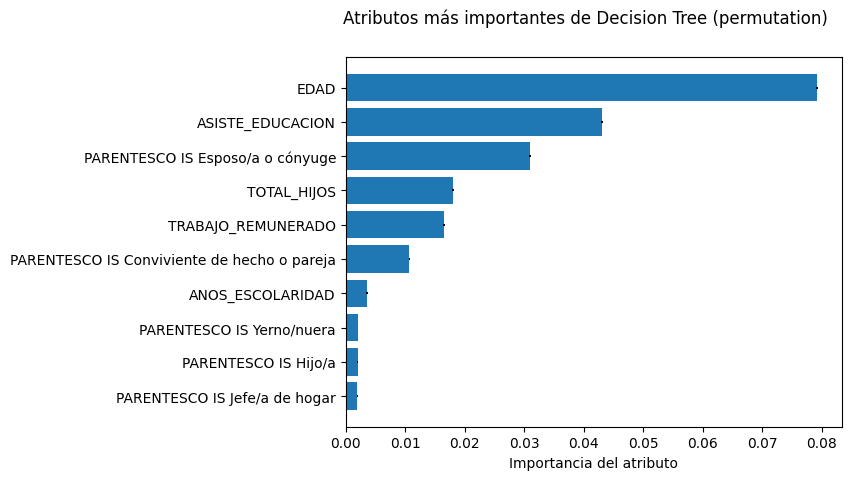

In [ ]:
tree_p_importances = permutation_importance(tree_clf, X_train, y_train, n_repeats=10)
plot_importances(
    tree_p_importances["importances_mean"],
    tree_p_importances["importances_std"],
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de Decision Tree (permutation)"
)

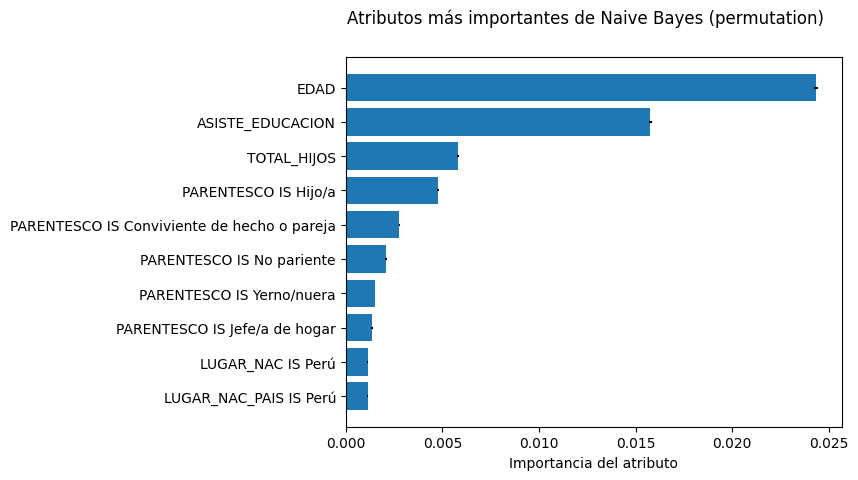

In [ ]:
nb_importances = permutation_importance(nb_clf, X_train, y_train, n_repeats=10)
plot_importances(
    nb_importances["importances_mean"],
    nb_importances["importances_std"],
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de Naive Bayes (permutation)"
)

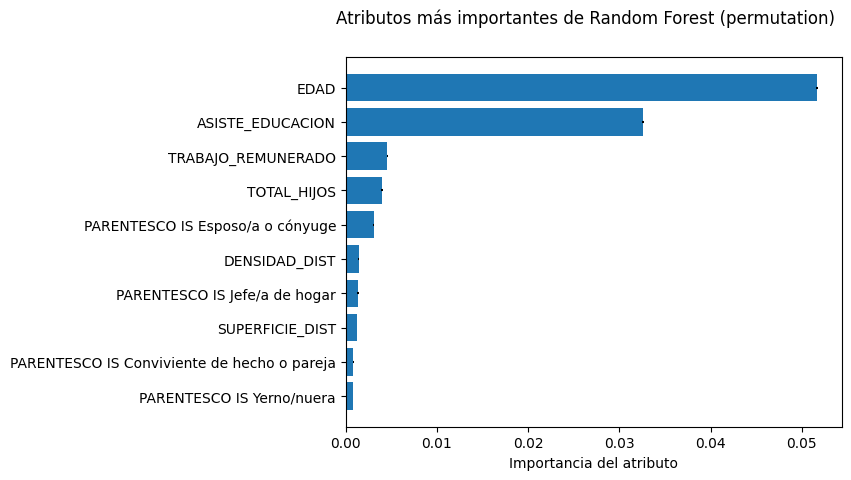

In [ ]:
rf_p_importances = permutation_importance(rf_clf, X_train, y_train, n_repeats=5)
plot_importances(
    rf_p_importances["importances_mean"],
    rf_p_importances["importances_std"],
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de Random Forest (permutation)"
)

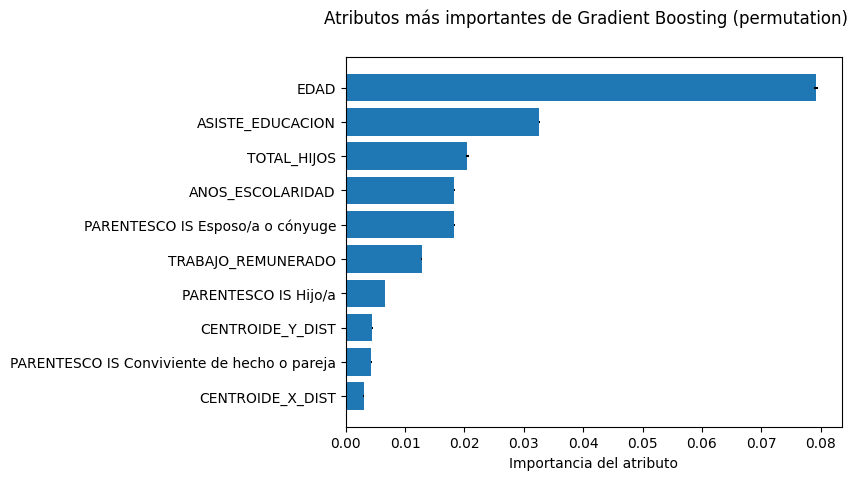

In [ ]:
gboost_p_importances = permutation_importance(gboost_clf, X_train, y_train, n_repeats=5)
plot_importances(
    gboost_p_importances["importances_mean"],
    gboost_p_importances["importances_std"],
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de Gradient Boosting (permutation)"
)

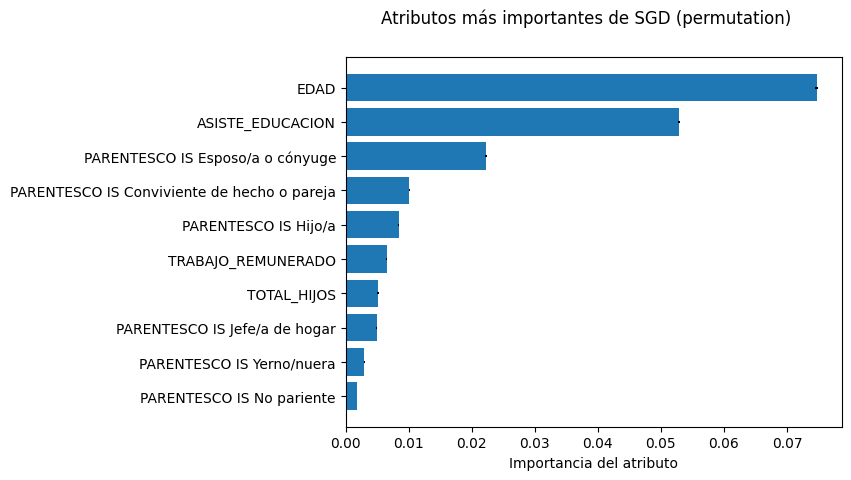

In [ ]:
sgd_importances = permutation_importance(sgd_clf, X_train, y_train, n_repeats=10)
plot_importances(
    sgd_importances["importances_mean"],
    sgd_importances["importances_std"],
    n_attrs=10,
    column_names=X.columns,
    plot_title="Atributos más importantes de SGD (permutation)"
)